In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [37]:
import kaggle

kaggle.api.authenticate()
# kaggle.api.dataset_download_files('elvis23/mental-health-conversational-data', path='.', unzip=True)
# # kaggle.api.dataset_download_files('xmaulana/psychikadataset-7b', path='.', unzip=True)
kaggle.api.dataset_download_files('camnugent/california-housing-prices', path='.', unzip=True)

In [38]:
# Load dataset dari file CSV lokal (setelah unzip)
df = pd.read_csv('housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


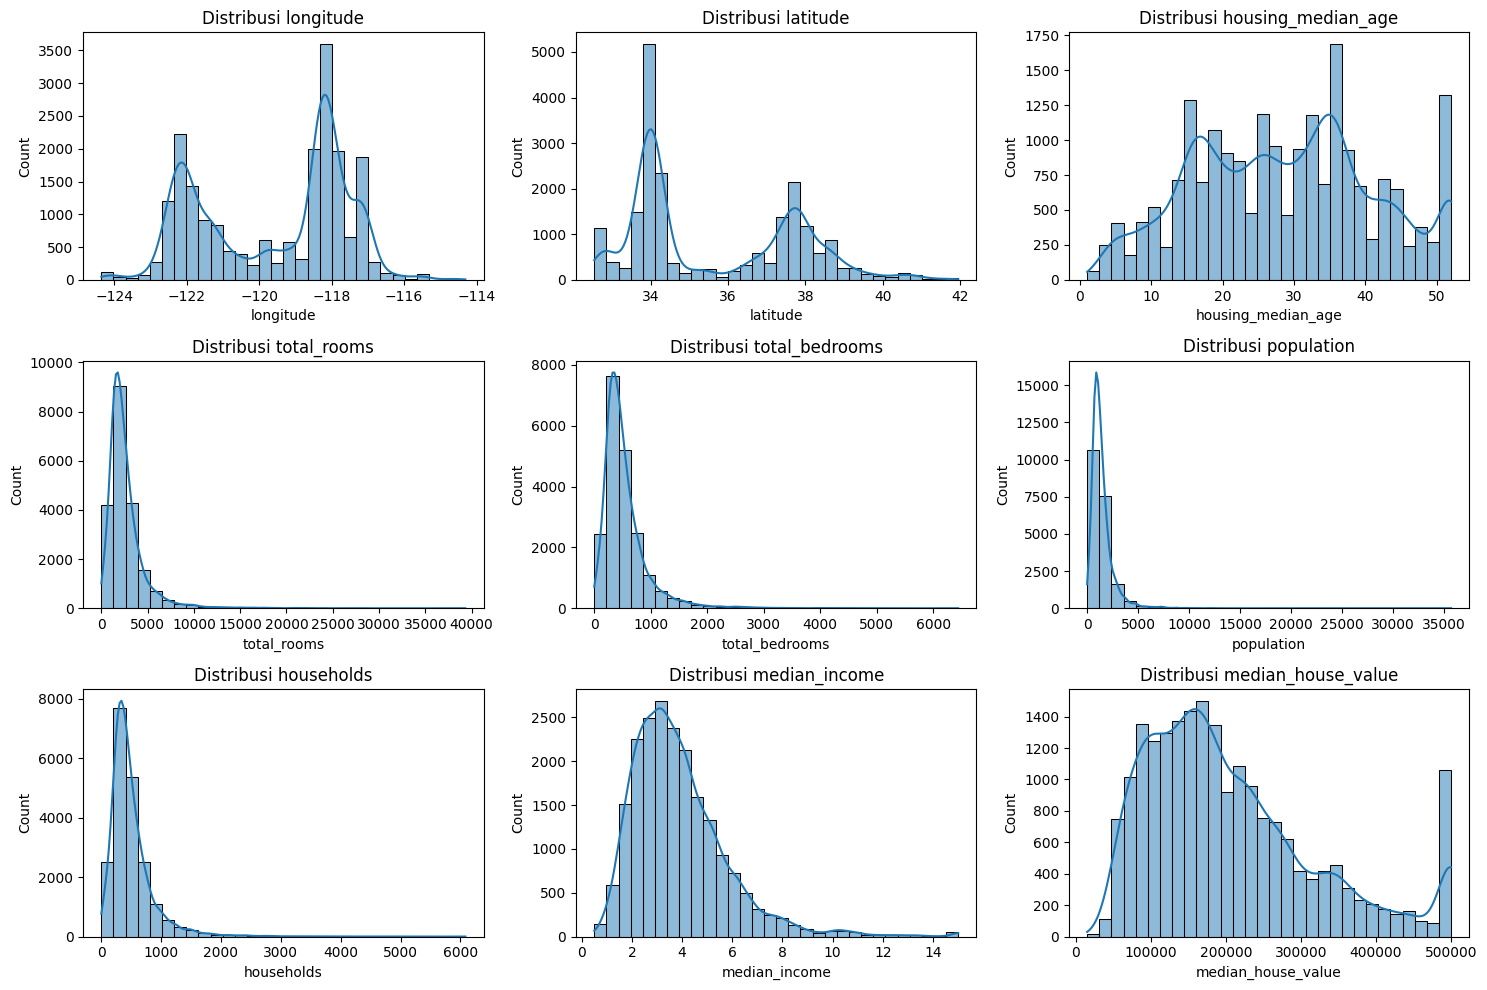

In [40]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


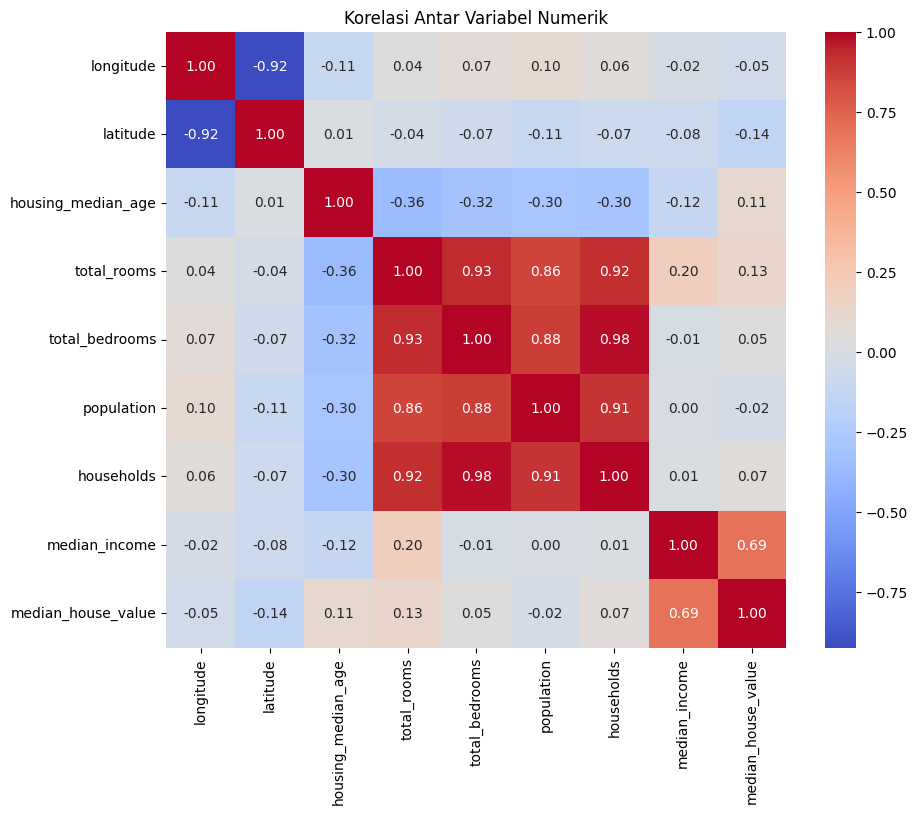

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()


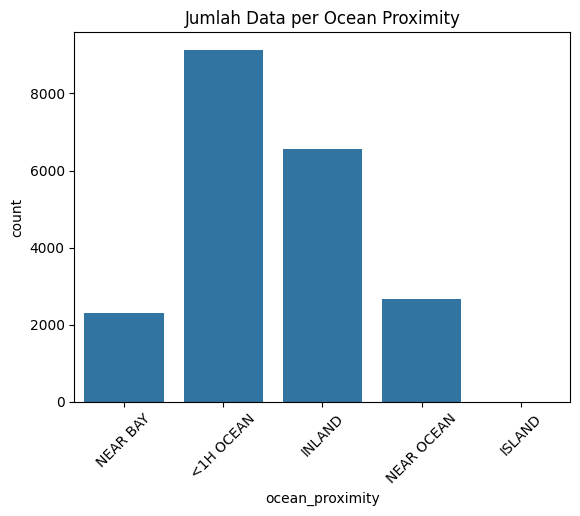

In [42]:
sns.countplot(x='ocean_proximity', data=df)
plt.title("Jumlah Data per Ocean Proximity")
plt.xticks(rotation=45)
plt.show()


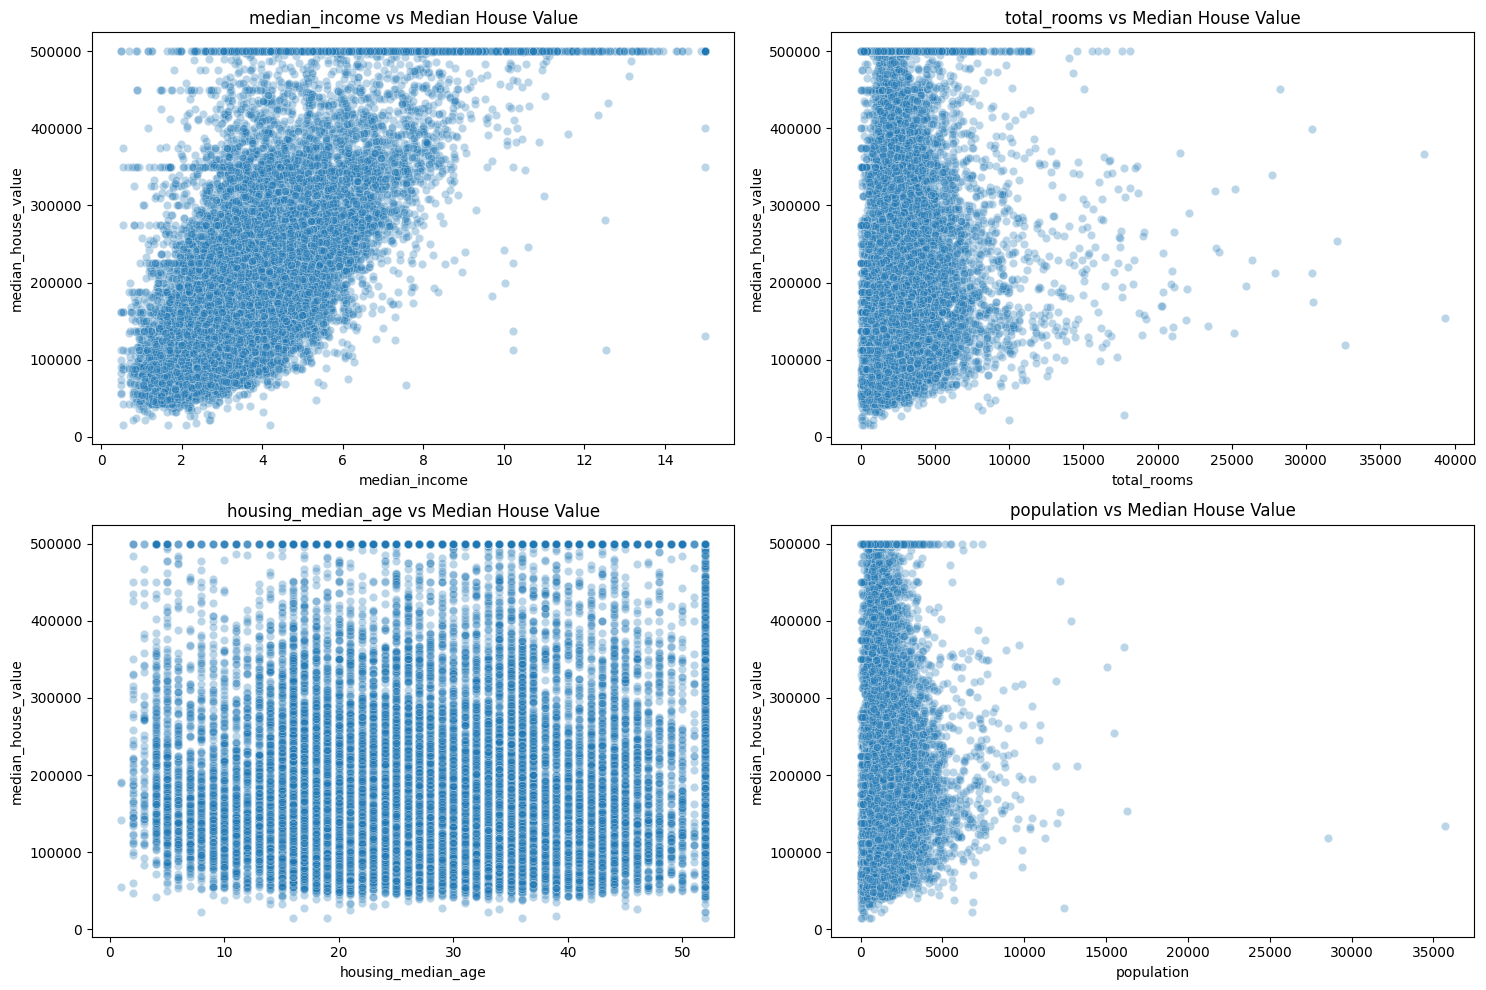

In [43]:
features = ['median_income', 'total_rooms', 'housing_median_age', 'population']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['median_house_value'], alpha=0.3)
    plt.title(f"{feature} vs Median House Value")
plt.tight_layout()
plt.show()


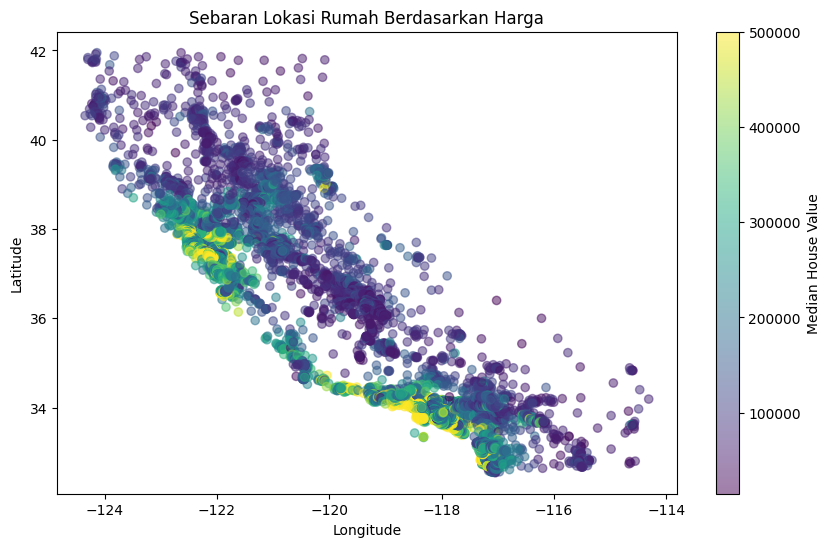

In [44]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Median House Value')
plt.title("Sebaran Lokasi Rumah Berdasarkan Harga")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [45]:
print(df.isnull().sum())
df.describe()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [46]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df_clean = df.copy()


C:\Users\Athaya Rohadatul\AppData\Local\Temp\ipykernel_28452\736007240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [47]:
print(df.isnull().sum())
df.describe()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
df_encoded = pd.get_dummies(df_clean, columns=['ocean_proximity'], drop_first=True)
df_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [49]:
# pastikan ini sebelum split
df_encoded = pd.get_dummies(df_clean, columns=['ocean_proximity'], drop_first=True)

# pisahkan target
X = df_encoded.drop('median_house_value', axis=1)  # semua fitur
y = df_encoded['median_house_value']               # target saja

# split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# prediksi
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)


In [51]:
def evaluate(y_true, y_pred, model_name):
    print(f"📌 Evaluasi Model: {model_name}")
    print(f"MSE : {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")
    print("")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


📌 Evaluasi Model: Linear Regression
MSE : 4904399775.9493
MAE : 50701.7790
R²  : 0.6257

📌 Evaluasi Model: Random Forest
MSE : 2388984639.8087
MAE : 31518.1805
R²  : 0.8177



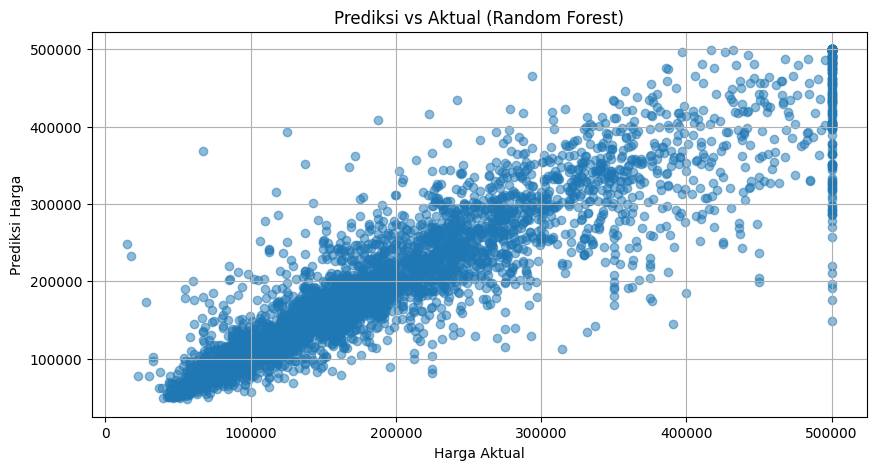

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Harga Aktual")
plt.ylabel("Prediksi Harga")
plt.title("Prediksi vs Aktual (Random Forest)")
plt.grid(True)
plt.show()


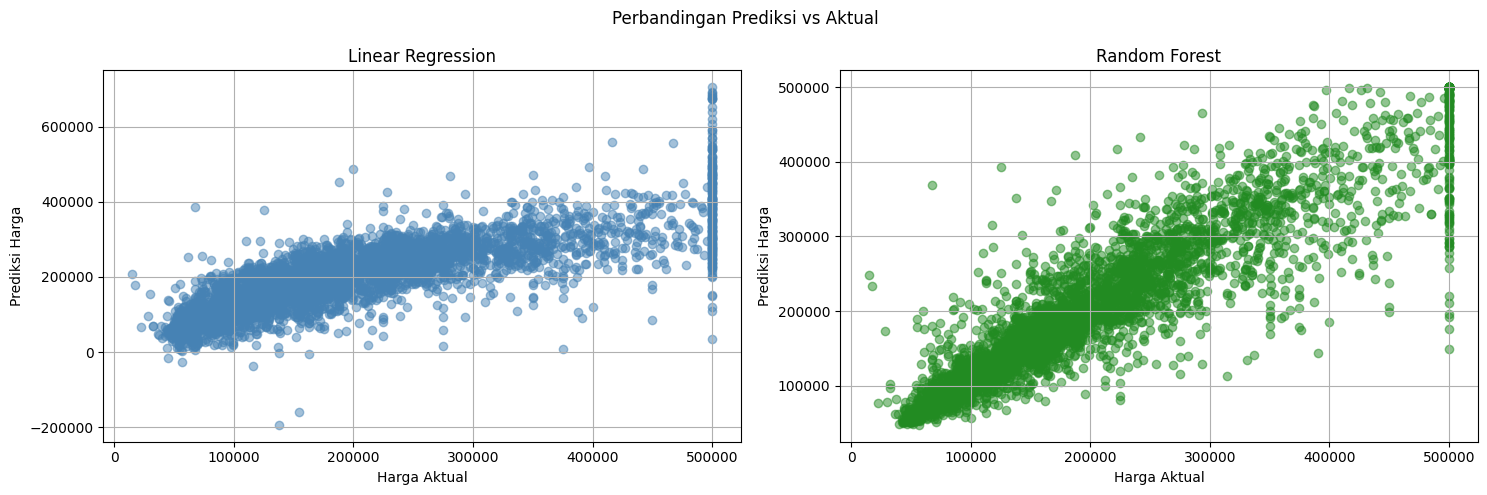

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(y_test, y_pred_lr, alpha=0.5, color='steelblue')
axs[0].set_title("Linear Regression")
axs[0].set_xlabel("Harga Aktual")
axs[0].set_ylabel("Prediksi Harga")
axs[0].grid(True)

axs[1].scatter(y_test, y_pred_rf, alpha=0.5, color='forestgreen')
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Harga Aktual")
axs[1].set_ylabel("Prediksi Harga")
axs[1].grid(True)

plt.suptitle("Perbandingan Prediksi vs Aktual")
plt.tight_layout()
plt.show()
